<a href="https://colab.research.google.com/github/SAIPRIYADODDA/SPAMMAIL/blob/main/Spammailprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/spam.csv',encoding='latin-1')
df

,labels,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will í_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df=df.iloc[:,[0,1]]
df.columns=['labels','text']
df.head(10)

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Frequency of Both labels ')

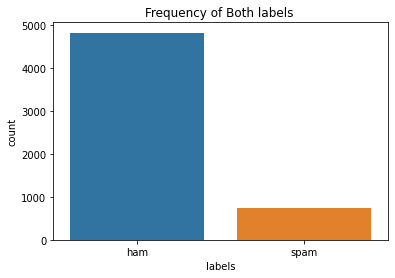

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df.labels)
plt.title('Frequency of Both labels ')

In [ ]:
X=df['text']
Y=df.labels
X,Y

(0       Go until jurong point, crazy.. Available only ...
 1                           Ok lar... Joking wif u oni...
 2       Free entry in 2 a wkly comp to win FA Cup fina...
 3       U dun say so early hor... U c already then say...
 4       Nah I don't think he goes to usf, he lives aro...
                               ...                        
 5567    This is the 2nd time we have tried 2 contact u...
 5568                Will í_ b going to esplanade fr home?
 5569    Pity, * was in mood for that. So...any other s...
 5570    The guy did some bitching but I acted like i'd...
 5571                           Rofl. Its true to its name
 Name: text, Length: 5572, dtype: object, 0        ham
 1        ham
 2       spam
 3        ham
 4        ham
         ... 
 5567    spam
 5568     ham
 5569     ham
 5570     ham
 5571     ham
 Name: labels, Length: 5572, dtype: object)

In [ ]:
# Encode the labels
#It is not a case of MultiClass classification
# we have to perform Binary classification
# So , LabelEncoder is a better option
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
Y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# I have fixed the number_of_columns=1
Y=Y.reshape(-1,1)
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from nltk.corpus import stopwords   #remove stopwords
from nltk.stem.porter import PorterStemmer   #stemming
import re
#Different models for converting text to vector
from gensim.models import Word2Vec   # word2vec method

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
port_stem=PorterStemmer()
corpus=[]
for i in range(len(df['text'])):
    text_1=re.sub('[^a-zA-Z]'," ",df['text'][i])
    text_1=text_1.lower()
    text_1=text_1.split()
    text_1=[port_stem.stem(word) for word in text_1 if word not in stopwords.words('english')]
    text_1=' '.join(text_1)
    corpus.append(text_1)

In [ ]:
len(corpus),len(Y)

(5572, 5572)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(corpus,Y,train_size=0.8,random_state=2)

In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(4457, 4457, 1115, 1115)

In [ ]:
#%%time
documents=[text.split() for text in x_train]

In [ ]:
len(documents)

4457

In [ ]:
import gensim
w2v_model = gensim.models.Word2Vec(size=300, 
                                            window=3, 
                                            min_count=2, 
                                            workers=4)
# min_count (int, optional) – Ignores all words with total frequency lower than this.
# workers (int, optional) – Use these many worker threads to train the model (=faster training with multicore machines).
# window (int, optional) – Maximum distance between the current and predicted word within a sentence.
# vector_size (int, optional) – Dimensionality of the word vectors.

In [ ]:
w2v_model

In [ ]:
w2v_model.build_vocab(documents)
# Build vocabulary from a dictionary of word frequencies.

In [ ]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 2877


In [ ]:
%%time
w2v_model.train(documents,total_examples=len(documents),epochs=32)

CPU times: user 4.56 s, sys: 58 ms, total: 4.62 s
Wall time: 2.64 s


(1074425, 1279456)

In [ ]:
w2v_model.most_similar("answer")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('question', 0.7315206527709961),
 ('wise', 0.6343182921409607),
 ('abil', 0.5984231233596802),
 ('xam', 0.5691772103309631),
 ('cute', 0.5669941902160645),
 ('someon', 0.526167631149292),
 ('draw', 0.5169441103935242),
 ('argu', 0.5121139287948608),
 ('trust', 0.5086641907691956),
 ('husband', 0.5059820413589478)]

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()

In [ ]:
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 5538


In [ ]:
tokenizer

In [ ]:
%%time
from keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen=300)
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen=300)

CPU times: user 93.4 ms, sys: 6.82 ms, total: 100 ms
Wall time: 101 ms


In [ ]:
x_train

array([[   0,    0,    0, ...,  997,   15,  404],
       [   0,    0,    0, ...,  122, 1600,   62],
       [   0,    0,    0, ..., 2000,   88,  998],
       ...,
       [   0,    0,    0, ...,  354,    6,    8],
       [   0,    0,    0, ...,    0,    0,  903],
       [   0,    0,    0, ...,    3, 1664, 2862]], dtype=int32)

In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(4457, 4457, 1115, 1115)

In [ ]:
# Build Embedding Layer
embedding_matrix = np.zeros((vocab_size, 300))
print(embedding_matrix)
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(5538, 300)


In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.08663255,  0.40628621, -0.02642512, ...,  0.57112497,
         0.10922522,  0.90810835],
       [-0.1012892 ,  0.22000466, -0.64210159, ...,  0.25626263,
         0.44739386,  0.24529499],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
from keras.layers import Activation, Dense, Dropout, Embedding
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
# Build The model
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          1661400   
                                                                 
 dropout_1 (Dropout)         (None, 300, 300)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                93440     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,754,905
Trainable params: 93,505
Non-trainable params: 1,661,400
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])


In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]


In [ ]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=8,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
126/126 [==============================] - 87s 661ms/step - loss: 0.1003 - accuracy: 0.9758 - val_loss: 0.0768 - val_accuracy: 0.9798 - lr: 0.0010
Epoch 2/8
126/126 [==============================] - 82s 654ms/step - loss: 0.0460 - accuracy: 0.9853 - val_loss: 0.0754 - val_accuracy: 0.9798 - lr: 0.0010
Epoch 3/8
126/126 [==============================] - 83s 657ms/step - loss: 0.0366 - accuracy: 0.9903 - val_loss: 0.0650 - val_accuracy: 0.9843 - lr: 0.0010
Epoch 4/8
126/126 [==============================] - 83s 655ms/step - loss: 0.0332 - accuracy: 0.9905 - val_loss: 0.0646 - val_accuracy: 0.9865 - lr: 0.0010
Epoch 5/8
126/126 [==============================] - 82s 654ms/step - loss: 0.0260 - accuracy: 0.9930 - val_loss: 0.0655 - val_accuracy: 0.9888 - lr: 0.0010
Epoch 6/8
126/126 [==============================] - 83s 657ms/step - loss: 0.0247 - accuracy: 0.9935 - val_loss: 0.0681 - val_accuracy: 0.9843 - lr: 0.0010
Epoch 7/8
126/126 [==============================] - 84s 6

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=32)
print()
print("LOSS:",score[0])
print("ACCURACY:",score[1]*100)


35/35 [==============================] - 3s 96ms/step - loss: 0.0942 - accuracy: 0.9794

LOSS: 0.09422331303358078
ACCURACY: 97.93722033500671


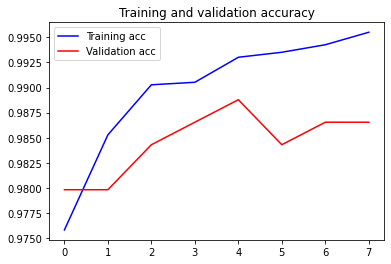

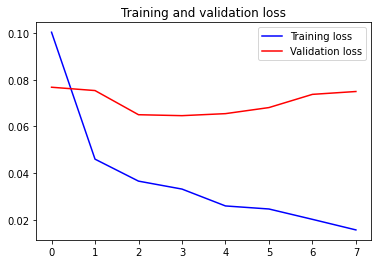

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
scaler = StandardScaler()
lr = LogisticRegression()
model1 = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])
model1.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [ ]:
y_pred = model1.predict(x_test)

cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)
print("true negative are:",cm[0][0])
print("false negative are:",cm[1][0])
print("true positive are:",cm[1][1])
print("false positive are:",cm[0][1])


Confusion matrix:
 [[948   9]
 [149   9]]
true negative are: 948
false negative are: 149
true positive are: 9
false positive are: 9


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       957
           1       0.50      0.06      0.10       158

    accuracy                           0.86      1115
   macro avg       0.68      0.52      0.51      1115
weighted avg       0.81      0.86      0.81      1115

